# Домашнее задание №1
## Классификация. Логистическая регрессия, kNN и SVM.


<span style="color: red; font-size: 14pt">  Дедлайн: 24.03.2019 - 23:59 </span>  

Итоговый ноутбук нужно загрузить сюда: [bit.ly/dafe_hw](http://bit.ly/dafe_hw)

На основе [hw1 ml at mipt](https://github.com/ml-mipt/ml-mipt/blob/master/Homeworks/HW_1_Linclass_kNN/HW1_kNN_and_Logistic_regression.ipynb)

### Часть 1. Небольшой numpy-разогрев. (5%)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')


In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0, 100, size=(10,10))
print(A)

[[ 8 20 85  3 22 41 45 88 58 75]
 [61 17 46 30 21 71  6 11 64 88]
 [19 71 96 92 45  2 51 13 12 33]
 [44 70 80 85 65 97 10 22 58 60]
 [98 49 88 40 51 79 94 37 67 51]
 [ 9 72 63 92 70 73 91 83 18 79]
 [83 88 13  4 34 34 30 62 24 88]
 [31 97 79 29 18 68 33 67 99  0]
 [21  0 14 91 64 54 60 36 54 23]
 [58  5 38 94  8 60 41 84 58 39]]


In [3]:
# Посчитайте средние значения в матрице по столбцам
A.mean(axis=0)

array([ 43.2,  48.9,  60.2,  56. ,  39.8,  57.9,  46.1,  50.3,  51.2,  53.6])

In [4]:
# Транспонируйте матрицу A

A.T

array([[ 8, 61, 19, 44, 98,  9, 83, 31, 21, 58],
       [20, 17, 71, 70, 49, 72, 88, 97,  0,  5],
       [85, 46, 96, 80, 88, 63, 13, 79, 14, 38],
       [ 3, 30, 92, 85, 40, 92,  4, 29, 91, 94],
       [22, 21, 45, 65, 51, 70, 34, 18, 64,  8],
       [41, 71,  2, 97, 79, 73, 34, 68, 54, 60],
       [45,  6, 51, 10, 94, 91, 30, 33, 60, 41],
       [88, 11, 13, 22, 37, 83, 62, 67, 36, 84],
       [58, 64, 12, 58, 67, 18, 24, 99, 54, 58],
       [75, 88, 33, 60, 51, 79, 88,  0, 23, 39]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[  64, 1220, 1615,  132, 2156,  369, 3735, 2728, 1218, 4350],
       [1220,  289, 3266, 2100, 1029, 5112,  528, 1067,    0,  440],
       [1615, 3266, 9216, 7360, 3960,  126,  663, 1027,  168, 1254],
       [ 132, 2100, 7360, 7225, 2600, 8924,   40,  638, 5278, 5640],
       [2156, 1029, 3960, 2600, 2601, 5530, 3196,  666, 4288,  408],
       [ 369, 5112,  126, 8924, 5530, 5329, 3094, 5644,  972, 4740],
       [3735,  528,  663,   40, 3196, 3094,  900, 2046, 1440, 3608],
       [2728, 1067, 1027,  638,  666, 5644, 2046, 4489, 3564,    0],
       [1218,    0,  168, 5278, 4288,  972, 1440, 3564, 2916, 1334],
       [4350,  440, 1254, 5640,  408, 4740, 3608,    0, 1334, 1521]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B

B = np.dot(A, A.T)
print(B)

[[28621 19751 17690 24464 28922 30044 20481 25297 15978 22238]
 [19751 24505 14750 27650 28486 23647 20547 20521 16069 20933]
 [17690 14750 29114 27897 27684 31634 16567 22416 18038 19399]
 [24464 27650 27897 41643 37860 38447 25036 32251 25081 28234]
 [28922 28486 27684 37860 47486 39831 29380 34407 26223 31018]
 [30044 23647 31634 38447 39831 49662 28392 31478 29102 31692]
 [20481 20547 16567 25036 29380 28392 30194 22696 13653 19698]
 [25297 20521 22416 32251 34407 31478 22696 37779 18958 24958]
 [15978 16069 18038 25081 26223 29102 13653 18958 24271 23569]
 [22238 20933 19399 28234 31018 31692 19698 24958 23569 30955]]


### Часть 2. Решение задачи классификации 95%

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('../../data/forest_dataset.csv')

In [8]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [9]:
from sklearn.model_selection import train_test_split

all_data, delayed_data = train_test_split(all_data, 
                                          train_size=0.8, test_size=0.2,
                                         shuffle=True, random_state=42)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [10]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (5%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [12]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [13]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, 
                                                                                        two_class_labels, 
                                                                                        train_size=0.8,  
                                                                                        test_size=0.2, 
                                                                                        shuffle=True, 
                                                                                        random_state=42)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [14]:
lr_clf = LogisticRegression()
lr_clf.fit(train_feature_matrix, train_labels)

acc = accuracy_score(lr_clf.predict(test_feature_matrix), test_labels)
print('accuracy = {:.3f}'.format(acc))

f1 = f1_score(lr_clf.predict(test_feature_matrix), test_labels)
print('f1 score = {:.3f}'.format(f1))

accuracy = 0.764
f1 score = 0.724


#### 2.2 Многоклассовая классификация: логистическая регрессия (30%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [15]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, 
                                                                                        labels, 
                                                                                        train_size=0.8,  
                                                                                        test_size=0.2, 
                                                                                        shuffle=True, 
                                                                                        random_state=42)

In [16]:
lr_clf = LogisticRegression(n_jobs=-1)

lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [17]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2'), 'C':np.linspace(0.01, 1, 10)}
clf = LogisticRegression(n_jobs=-1)
lr_clf = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
lr_clf.fit(train_feature_matrix, train_labels)

Wall time: 35.3 s


In [18]:
lr_clf.cv_results_

{'mean_fit_time': array([  4.71392074,   1.07352529,   9.30269871,   1.51614065,
         12.40395417,   1.60057449,  13.71074739,   1.4093399 ,
         11.32898583,   1.41781964,  11.76596994,   1.40915027,
         11.2215332 ,   1.38349185,  10.45904689,   1.39218402,
          9.3778903 ,   1.47239799,   8.45809436,   1.28878598]),
 'std_fit_time': array([ 0.4599127 ,  0.05934106,  0.5033747 ,  0.03825041,  0.6341032 ,
         0.04177638,  1.34634648,  0.0783568 ,  1.84878925,  0.11395262,
         2.25991733,  0.07902588,  0.98185119,  0.07097798,  1.0578205 ,
         0.10058258,  0.24304002,  0.18468576,  0.96365054,  0.09939509]),
 'mean_score_time': array([ 0.00978479,  0.00678186,  0.00938897,  0.00429869,  0.00938621,
         0.00398922,  0.00461035,  0.00139723,  0.00119662,  0.00099792,
         0.00100622,  0.00131221,  0.00079832,  0.00101171,  0.00080142,
         0.00099669,  0.00040245,  0.00121374,  0.00059557,  0.00110135]),
 'std_score_time': array([  4.04851950

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [19]:
x_l1 = list(map(lambda x: x['C'], lr_clf.cv_results_['params'][::2]))
x_l2 = list(map(lambda x: x['C'], lr_clf.cv_results_['params'][1::2]))
score_l1 = np.array(lr_clf.cv_results_['mean_train_score'][::2])
score_l2 = np.array(lr_clf.cv_results_['mean_train_score'][1::2])

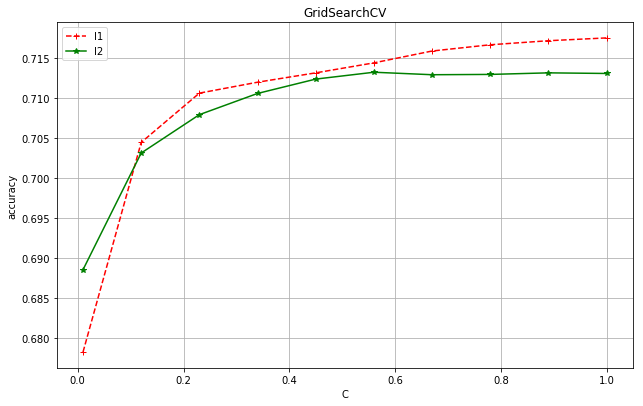

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(x_l1, score_l1, 'r+--')
plt.plot(x_l2, score_l2, 'g*-')

axes.set_xlabel('C')
axes.set_ylabel('accuracy')
axes.set_title('GridSearchCV')
axes.legend([r'l1', 'l2'], loc = 0)

plt.grid()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [21]:
max_l1 = score_l1[np.argmax(score_l1)]
max_C_l1 = x_l1[np.argmax(score_l1)]

max_l2 = score_l2[np.argmax(score_l2)]
max_C_l2 = x_l2[np.argmax(score_l2)]

In [22]:
print('C_l1 = ', max_C_l1, 'score_l1 = ', max_l1)
print('C_l2 = ', max_C_l2, 'score_l2 = ', max_l2)

C_l1 =  1.0 score_l1 =  0.7175776655
C_l2 =  0.56 score_l2 =  0.713280461659


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [33]:
best_lr_clf = LogisticRegression(penalty='l1', C=1.0, n_jobs=-1)

best_lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
predict_matrix = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [35]:
## усредненные по всем объектам из тестовой выборки значения вероятностей
predict_labels = {i:x for i, x in enumerate(predict_matrix.mean(axis=0))}

## частоты меток классов в обучающей выборке
unique, counts = np.unique(test_labels, return_counts=True)
true_labels = dict(zip(unique, counts/test_labels.shape[0]))

In [36]:
## соответсвие класса к разности между точной частотой меток классов к предсказнной
comparison_dict = {i+1:abs(round(x,3)) for i, x in enumerate(predict_matrix.mean(axis=0) - counts/test_labels.shape[0])}

In [37]:
comparison_dict

{1: 0.032000000000000001,
 2: 0.027,
 3: 0.0080000000000000002,
 4: 0.001,
 5: 0.0060000000000000001,
 6: 0.002,
 7: 0.0070000000000000001}

In [38]:
## MSE частот
mse_acc = np.linalg.norm(predict_matrix.mean(axis=0) - counts/test_labels.shape[0])
print('MSE = {:.4f}'.format(mse_acc))

MSE = 0.0435


#### 2.3 Многоклассовая классификация: kNN (20%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

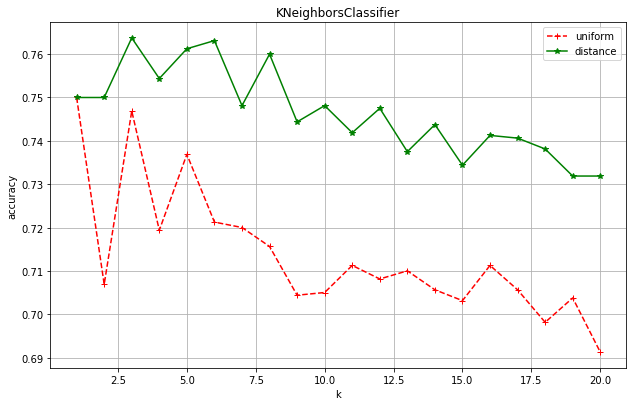

{'uniform': {'acc': 0.75, 'k': 1}, 'distance': {'acc': 0.76375000000000004, 'k': 3}}


In [39]:
from sklearn.neighbors import KNeighborsClassifier

fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

N = 20 ## количество перебираемых соседей
best_score = {'uniform': None, 'distance': None} ## лучший результат для каждого метода

color = {'uniform': 'r+--', 'distance': 'g*-'}
for weight in ['uniform', 'distance']:
    acc = [[]]*N
    for k in range(1, N+1):
        knn = KNeighborsClassifier(weights=weight, n_neighbors=k, n_jobs=-1)
        knn.fit(train_feature_matrix, train_labels)
        acc[k-1] = accuracy_score(knn.predict(test_feature_matrix), test_labels)
    plt.plot(np.arange(1,N+1), acc, color[weight])
    
    acc = np.array(acc)
    best_score[weight] = {'acc': np.max(acc), 'k': np.argmax(acc) + 1}

axes.set_xlabel('k')
axes.set_ylabel('accuracy')
axes.set_title('KNeighborsClassifier')
axes.legend([r'uniform', 'distance'], loc = 0)
plt.grid()
plt.show()


print(best_score)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [40]:
knn_best = KNeighborsClassifier(weights='distance', n_neighbors=6, n_jobs=-1)
knn_best.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='distance')

In [41]:
knn_predict_matrix = knn_best.predict_proba(test_feature_matrix)

#### 2.4 Метод опорных векторов (30%)

Прежде чем приступить к использованию метода опорных векторов, вспомним что для линейный моделей критично масштабировать данные, для этого воспользуемся `MinMaxScaler`. Не забывайте, что у этого класса сущестуют методы `.fit()`, `.transform()`, `.fit_transform()`. Учитывайте, что данные из отложенной выборки нам недоступны при обучении модели.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.fit_transform(test_feature_matrix)

Обучим классификатор

In [44]:
from sklearn.svm import SVC

In [45]:
%%time

parameters = {'kernel':('linear', 'rbf'), 'C':np.linspace(0.01, 1, 10)}
svc = SVC()
lr_svc = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', n_jobs=-1)
lr_svc.fit(train_feature_matrix_scaled, train_labels)

Wall time: 35.2 s


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `C` и `kernel`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `kernel` - `['linear', 'rbf']`. Критерий качества `scoring = 'accuracy'`.

Постройте графики средних значений критерия качества accuracy для типов ядер `linear` и `rbf`,  в зависимости от коэффициента `C`.

_Подсказка:_ Если метод учится слишком долго, попробуйте ограничить кол-во итераций (`max_iter`) и/или увеличить параметр останова`tol`

In [46]:
lr_svc.cv_results_

{'mean_fit_time': array([ 7.13730702,  8.85032501,  5.54895654,  8.75737371,  5.28785353,
         8.51083055,  5.42508583,  8.66042643,  5.37322245,  7.65810881,
         5.09476757,  7.66548939,  4.81910529,  7.34355044,  5.16119003,
         7.21786289,  5.11231942,  6.13499632,  3.76457438,  3.95167122]),
 'std_fit_time': array([ 0.22848265,  0.30641227,  0.14068095,  0.2490349 ,  0.13046599,
         0.45699748,  0.22215857,  0.2242358 ,  0.28377336,  0.32939622,
         0.30513849,  0.23077819,  0.13160552,  0.25409123,  0.11795808,
         0.19837525,  0.24236144,  0.5672973 ,  0.41896048,  0.19086549]),
 'mean_score_time': array([ 1.03323727,  1.20318022,  0.73283896,  1.20557375,  0.55551438,
         1.16787682,  0.46754866,  1.03423181,  0.46036801,  0.98416653,
         0.46655021,  1.03123932,  0.47971802,  1.00371518,  0.40172496,
         0.53379722,  0.4533874 ,  0.47631507,  0.29667697,  0.37104239]),
 'std_score_time': array([ 0.03129035,  0.04773266,  0.03739859,  

In [47]:
x_linear = list(map(lambda x: x['C'], lr_svc.cv_results_['params'][::2]))
x_rbf = list(map(lambda x: x['C'], lr_svc.cv_results_['params'][1::2]))
score_linear = np.array(lr_svc.cv_results_['mean_train_score'][::2])
score_rbf = np.array(lr_svc.cv_results_['mean_train_score'][1::2])

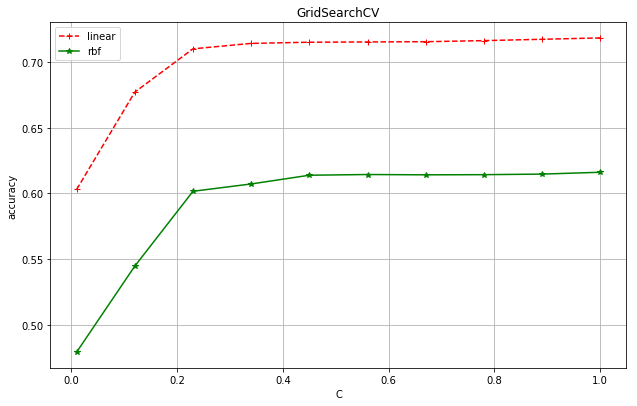

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(x_linear, score_linear, 'r+--')
plt.plot(x_rbf, score_rbf, 'g*-')

axes.set_xlabel('C')
axes.set_ylabel('accuracy')
axes.set_title('GridSearchCV')
axes.legend([r'linear', 'rbf'], loc = 0)

plt.grid()
plt.show()

In [49]:
max_linear = score_linear[np.argmax(score_linear)]
max_C_linear = x_linear[np.argmax(score_linear)]

max_rbf = score_rbf[np.argmax(score_rbf)]
max_C_rbf = x_rbf[np.argmax(score_rbf)]

In [50]:
print('C_linear = ', max_C_linear, 'score_linear = ', max_linear)
print('C_rbf = ', max_C_rbf, 'score_rbf = ', max_rbf)

C_linear =  1.0 score_linear =  0.718398268102
C_rbf =  1.0 score_rbf =  0.616054561894


#### 2.5 Сравнение результатов логистической регрессии, kNN и SVC (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии, лучшего kNN и лучшей модели SVM  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [51]:
best_lr_clf = LogisticRegression(penalty='l1', C=1.0, n_jobs=-1)
best_lr_clf.fit(train_feature_matrix, train_labels)
print('clf accuracy_score = ', accuracy_score(best_lr_clf.predict(test_feature_matrix_scaled), test_labels))

svc_best = SVC(kernel='linear', C=1.0)
svc_best.fit(train_feature_matrix_scaled, train_labels)
print('svc accuracy_score = ', accuracy_score(svc_best.predict(test_feature_matrix_scaled), test_labels))

knn_best = KNeighborsClassifier(weights='distance', n_neighbors=9, n_jobs=-1)
knn_best.fit(train_feature_matrix, train_labels)
print('knn accuracy_score = ', accuracy_score(knn_best.predict(test_feature_matrix), test_labels))

clf accuracy_score =  0.529375
svc accuracy_score =  0.708125
knn accuracy_score =  0.744375


In [53]:
labels_delayed = delayed_data[delayed_data.columns[-1]].values
feature_matrix_delayed = delayed_data[delayed_data.columns[:-1]].values
feature_matrix_delayed_scaled = scaler.fit_transform(feature_matrix_delayed)

In [54]:
print('Качество моделей на отложенных выборках:')

print('clf accuracy_score = ', accuracy_score(best_lr_clf.predict(feature_matrix_delayed_scaled), labels_delayed))

print('svc accuracy_score = ', accuracy_score(svc_best.predict(feature_matrix_delayed_scaled), labels_delayed))

print('knn accuracy_score = ', accuracy_score(knn_best.predict(feature_matrix_delayed), labels_delayed))

Качество моделей на отложенных выборках:
clf accuracy_score =  0.496
svc accuracy_score =  0.6635
knn accuracy_score =  0.7465
